In [1]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
image_train = pd.read_csv('data/sign_mnist_train.csv')
image_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


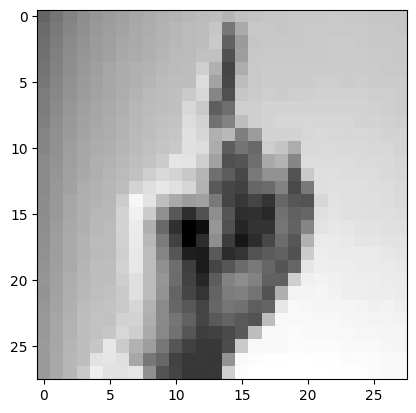

In [3]:
plt.imshow(image_train.iloc[0, 1:].values.reshape(28, 28), cmap='gray')

In [4]:
import cv2  # pip install opencv-contrib-python opencv-python

# convert images to grayscale
bw_images = []
for img in image_train.iloc[:, 1:].values:
    bw_images.append(img)

In [5]:
sift = cv2.SIFT_create()

# initialize lists where we will store *all* keypoints and descriptors
keypoints = []
descriptors = []

In [6]:
#reshape each photo into 28 x 28
bw_images = [img.reshape((28,28)) for img in bw_images]

In [7]:
bw_images = [cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8') for img in bw_images]

In [8]:
for img in bw_images:
    #img = np.uint8(img)
    #img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    kp, des = sift.detectAndCompute(img, None)
    
    keypoints.append(kp)
    descriptors.append(des)

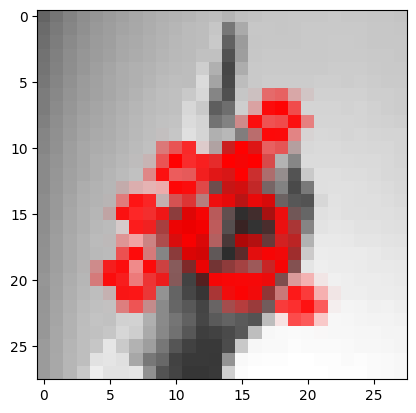

[[  2.   0.   0. ...   0.   0.   0.]
 [119. 122.   4. ...   6.   0.   0.]
 [ 42. 128.  12. ...  14.   1.   0.]
 ...
 [  0.   1.   5. ...   4.   2.  44.]
 [  0.   1.   4. ...  10.   0.   0.]
 [ 84. 109.  23. ...   0.   3.   3.]]


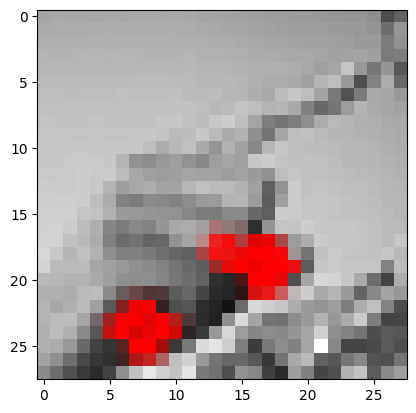

[[  0.   0.   3.  63.  62.   7.   0.   0.  14.   4.  13.  73. 147.  21.
    0.   1. 147.  54.  23.  19.  60.  15.   1.   5.  19.  10.  41.  31.
   23.  11.   1.   1.   0.   0.   1.  19.  86. 147.   4.   0.  21.   6.
    5.  93. 147.  88.   3.   2. 147.  27.   6.  30.  47.  16.   5.  31.
   31.   2.   1.   2.   8.  15.   5.  10.   0.   0.   0.   2.  51. 113.
    3.   0.  15.   2.   1.   8. 147. 147.   5.   4. 139.  34.   1.   3.
   44.  79.   5.  15.   8.   2.   0.   0.   0.   0.   0.   1.   0.   0.
    0.   1.   6.   2.   0.   0.   0.   0.   0.   2.  69.  61.   0.   0.
    0.   1.   0.   0.  19.  35.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   4.   2.   0.   0.   2.   0.
    0.   0.  65.  10.   0.   0.   1.   0.   0.   8.   9.   0.   0.   0.
    0.   0.   0.   4.   4.   4.   2.  16.   8.   0.   0.   0.  30.  11.
    4. 120. 120.   5.   2.   7. 134.  36.   3.  19.  17.   1.   1.  34.
   81.   4.   0.   0.   0.   0.   0.  19.  30.   9.

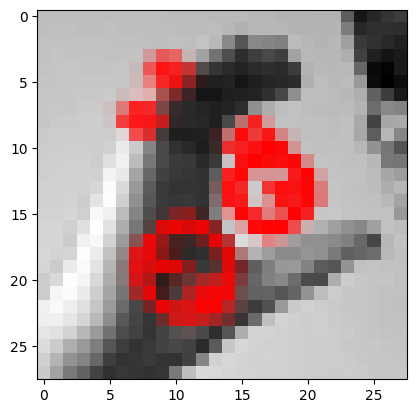

[[ 91.  19.   1.   3.  32.   5.   0.   0. 176.  39.   0.   0.   0.   0.
    0.   0.  79.  16.   2.  20.  18.   0.   0.   0.   0.   0.   1.  13.
    7.   0.   0.   0.  96.  38.   6.  12.  65.   0.   0.   2. 176.  53.
    0.   0.   0.   0.   0.   6. 102.  13.   3.  23.   9.   0.   0.   0.
    0.   0.   2.  19.   2.   0.   0.   0. 110.   4.   1.  24.  28.   0.
    1.  74. 176.   4.   1.   1.   0.   0.   0. 148.  70.   5.   5.  23.
    3.   0.   0.  10.   0.   0.   8.  13.   0.   0.   0.   0.  43.   0.
    0.   3.   1.   0.   8. 176. 108.   2.   4.   3.   0.   0.   0. 172.
   10.   1.  12.  16.   0.   0.   0.   5.   0.   0.  12.   4.   0.   0.
    0.   0.]
 [ 53. 139.   7.   2.   9.   5.   0.   0. 151. 151.   1.   1.   2.   0.
    0.   0.  18.  26.   1.   9.  16.   0.   0.   0.   0.   0.   1.  11.
    3.   0.   0.   0.  65.  44.   3.   6.  65.  23.   0.   1. 151. 128.
    0.   0.   0.   0.   0.   9.  96.  31.   2.  16.   9.   0.   0.   1.
    0.   0.   3.  18.   2.   0.   0.   0.  75.   3.

In [15]:
output_image = []
for x in range(3):
    output_image.append(cv2.drawKeypoints(bw_images[x], keypoints[x], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(output_image[x], cmap='gray')
    plt.show()
    print(descriptors[x])

In [12]:
np.random.seed(0)
# select 1000 random image index values
sample_idx = np.random.randint(0, len(image_train)+1, 1000).tolist()

descriptors_sample = []

for n in sample_idx:
    descriptors_sample.append(np.array(descriptors[n]))

In [24]:
for elem in descriptors_sample:
    print(elem.shape)



(1, 128)
(11, 128)
(7, 128)
(7, 128)
(6, 128)
(7, 128)
(13, 128)
(9, 128)
(10, 128)
(5, 128)
(14, 128)
(10, 128)
(9, 128)
(9, 128)
(4, 128)
(9, 128)
(8, 128)
(7, 128)
(6, 128)
(4, 128)
(8, 128)
(9, 128)
(4, 128)
(3, 128)
(5, 128)
(13, 128)
(10, 128)
(4, 128)
(9, 128)
(5, 128)
(5, 128)
(6, 128)
(6, 128)
(8, 128)
(6, 128)
(5, 128)
(10, 128)
(6, 128)
(4, 128)
(7, 128)
(10, 128)
(13, 128)
(7, 128)
(8, 128)
(6, 128)
(12, 128)
(8, 128)
(7, 128)
(3, 128)
(7, 128)
(6, 128)
(5, 128)
(5, 128)
(11, 128)
(3, 128)
(6, 128)
(11, 128)
(8, 128)
(6, 128)
(9, 128)
(7, 128)
(9, 128)
(10, 128)
(11, 128)
(6, 128)
(5, 128)
(6, 128)
(8, 128)
(10, 128)
(11, 128)
(4, 128)
(9, 128)
(10, 128)
(9, 128)
(4, 128)
(4, 128)
(8, 128)
(8, 128)
(9, 128)
(2, 128)
(10, 128)
(8, 128)
(5, 128)
(5, 128)
(6, 128)
(6, 128)
(6, 128)
(5, 128)
(6, 128)
(6, 128)
(4, 128)
(8, 128)
(7, 128)
(15, 128)
(6, 128)
(8, 128)
(3, 128)
(9, 128)
(4, 128)
(9, 128)
(3, 128)
(11, 128)
(9, 128)
(7, 128)
(7, 128)
(6, 128)
(8, 128)
(9, 128)
(5, 128

In [17]:
all_descriptors = []
# extract image descriptor lists
for img_descriptors in descriptors_sample:
    # extract specific descriptors within the image
    for descriptor in img_descriptors:
        all_descriptors.append(descriptor)
# convert to single numpy array
all_descriptors = np.stack(all_descriptors)

TypeError: iteration over a 0-d array